    # Imports

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [98]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.delete_float_array.restype = None


In [99]:
X = np.array([
      [1, 1],
      # [1, 2],
      [2, 3],
      [3, 3]
], dtype=ctypes.c_float)
Y = np.array([
      [1,-1],
      # [1,-1],
      [-1,1],
      [-1,1]
],dtype=ctypes.c_float)

X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [100]:
X_to_predict = []

for i in range(1000) :
    x_1 = random.uniform(0,4)
    x_2 = random.uniform(0,4)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [101]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,  # pointer_to_inputs_train : *mut f32,
    len(X),  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,  # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),  # number_of_inputs_to_predict : usize,
    len(X[0]),  # dimension_of_inputs : usize,
    y_to_predict_ptr,  # pointer_to_labels : *mut f32,
    2,  # number_of_classes : usize,
    0.5,  # gamma : f32,
    True,  # is_classification : bool,
    len(X),  # number_of_clusters : usize
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr, (len(X_to_predict) * 2,))
print(len(rbf_trained_model))

2000


In [102]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for i in range(0,len(rbf_trained_model),2) :
    if rbf_trained_model[i] < rbf_trained_model[i+1] :
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('green')

In [103]:
print(len(predicted_x_1))
print(len(rbf_trained_model))

1000
2000


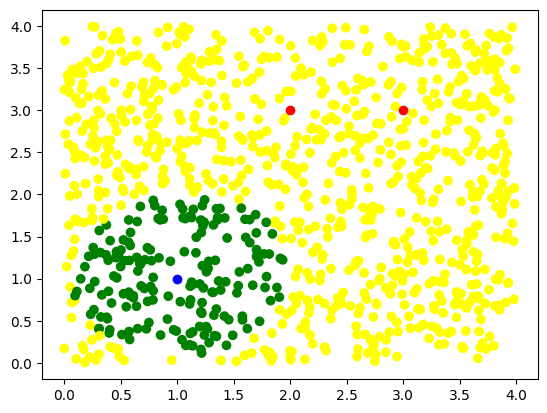

<Figure size 640x480 with 0 Axes>

In [104]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
#plt.scatter(predicted_x1, predicted_x2, c=predicted_labels_full)

plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

In [10]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.delete_float_array.restype = None


In [11]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])], dtype=ctypes.c_float)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0],dtype=ctypes.c_float)

In [12]:
len(X)

100

In [13]:
X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

#print(Y)

In [14]:
X_to_predict = []

for i in range(1000):
    x_1 = random.uniform(1.0, 3.0)
    x_2 = random.uniform(1.0, 3.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [15]:
print(len(X_to_predict))
print(len(X[0]))
print(len(X_to_predict[0]))
print(len(Y[0]))

1000
2
2
1


In [16]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)

In [17]:
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,        # pointer_to_inputs_train : *mut f32,
    len(X),                  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,    # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),       # number_of_inputs_to_predict : usize,
    len(X[0]),               # dimension_of_inputs : usize,
    y_to_predict_ptr,        # pointer_to_labels : *mut f32,
    len(Y[0]),               # number_of_classes : usize,
    0.01,                    # gamma : f32,
    True,                    # is_classification : bool,
    len(X),                  # number_of_clusters : usize
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr,(len(X_to_predict)*len(Y[0]),))
print(len(rbf_trained_model))

1000


In [18]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in rbf_trained_model :
    if y < 0 :
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('green')

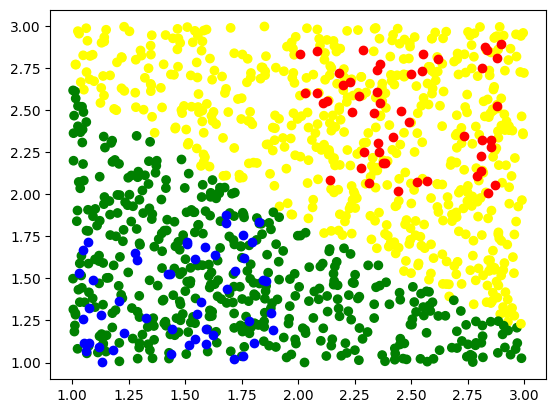

<Figure size 640x480 with 0 Axes>

In [19]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[2. 2. 1.]


In [122]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]],dtype=ctypes.c_float)
Y = np.array([1, 1, -1, -1],dtype=ctypes.c_float)

In [123]:
w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((9,)))
print(w_array)
X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)

[ 0.17323709  0.25661612  0.98154044  0.79438305 -0.6196418  -0.5103233
  0.72206664  0.9956136  -0.49332833]


In [10]:
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    1,  # number of classes to predict
    0.02,  # learning rate
    10000,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (9,))
print(pmc_trained_model)


[ 5.6821856e+00 -1.2491026e+00 -1.6431340e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00 -4.7359758e+12 -3.8799799e-34
  2.8025969e-45]


In [11]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(100000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(0.0, 1.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(0.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)
pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    1,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))
# print(pmc_predict_model)
# print(len(X_to_predict))
# print(len(X_to_predict_flat))
# print(pmc_predict_model)

In [12]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in pmc_predict_model :
    if y <= 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')

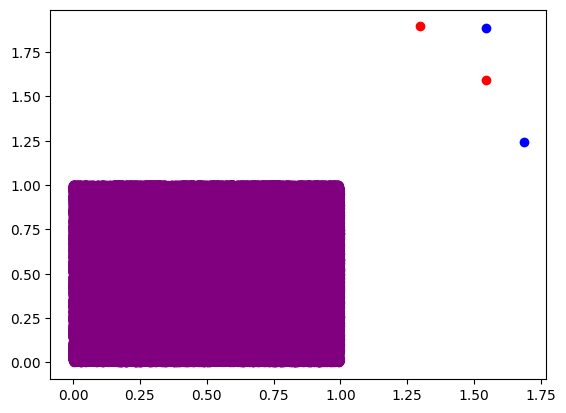

<Figure size 640x480 with 0 Axes>

In [13]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 4, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[2. 4. 1.]


In [29]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

X = np.array(X,dtype=ctypes.c_float)
Y = np.array(Y,dtype=ctypes.c_float)

In [30]:
w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((17,)))
print(w_array)
X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)

[ 0.87478566 -0.63860416  0.48622656  0.66612077  0.89115715  0.25291014
 -0.13074756  0.4162755  -0.10388017  0.29378796  0.98914266  0.95286965
 -0.89763737 -0.7932968  -0.18435192  0.53095555  0.21159244]


In [31]:
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    1,  # number of classes to predict
    0.02,  # learning rate
    1000,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (17,))
print(pmc_trained_model)


[ 3.035991   -3.4293213   3.077384   -3.5902722  11.508091   -0.21314345
  0.03476299 12.564077   -0.08881321 12.2725525  10.932006    0.2240587
 -5.210633    6.7484584  -6.3339195   7.0180597  -7.2466617 ]


In [32]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(100000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(-1.0, 1.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)
pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    1,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))
# print(pmc_predict_model)
# print(len(X_to_predict))
# print(len(X_to_predict_flat))
# print(pmc_predict_model)

In [33]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in pmc_predict_model :
    if y <= 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')

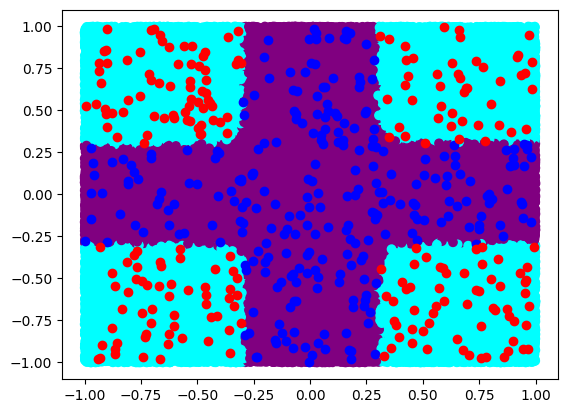

<Figure size 640x480 with 0 Axes>

In [34]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 3], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[2. 3.]


In [38]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

X=np.array(X,dtype=ctypes.c_float)
Y=np.array(Y,dtype=ctypes.c_float)

In [39]:
w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((9,)))
print(w_array)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)

[-0.6358788   0.70913005 -0.49449897 -0.8819237   0.5722389  -0.28403997
  0.78749704 -0.5880022  -0.8057599 ]


In [40]:
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    3,  # number of classes to predict
    0.02,  # learning rate
    500,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (9,))
print(pmc_trained_model)

[-4.350324    0.10393085 -4.2953453  -8.326441    0.10638621  7.8453975
 -8.419448   12.781408   -8.195856  ]


In [41]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(100000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(-1.0, 1.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)
pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    3,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (3 * len(X_to_predict),))
# print(pmc_predict_model)
# print(len(X_to_predict))
# print(len(X_to_predict_flat))
# print(pmc_predict_model)

In [42]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

# -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0
# -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0
# -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0

for j in range(0,len(pmc_predict_model)-2,3) :
    if pmc_predict_model[j] > pmc_predict_model[j+1] and pmc_predict_model[j] > pmc_predict_model[j+2] :
        predicted_labels.append('cyan')
    elif pmc_predict_model[j+1] > pmc_predict_model[j] and pmc_predict_model[j+1] > pmc_predict_model[j+2] :
        predicted_labels.append('purple')
    elif pmc_predict_model[j+2] > pmc_predict_model[j] and pmc_predict_model[j+2] > pmc_predict_model[j+1]:
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('green')

# predicted_labels = []
# predicted_x_1 = []
# predicted_x_2 = []
#
# for i in range(len(X_to_predict_flat)) :
#     if i%2 == 0 :
#         predicted_x_1.append(X_to_predict_flat[i])
#     else :
#         predicted_x_2.append(X_to_predict_flat[i])
#
# for j in range(0,len(pmc_predict_model)-2,3) :
#     if -pmc_predict_model[j] - pmc_predict_model[j+1] - pmc_predict_model[j+2] > 0 and pmc_predict_model[j+1] < 0 and pmc_predict_model[j] - pmc_predict_model[j+1] - pmc_predict_model[j+2] < 0:
#         predicted_labels.append('cyan')
#     elif -pmc_predict_model[j] - pmc_predict_model[j+1] - pmc_predict_model[j+2] < 0 and pmc_predict_model[j+1] > 0 and pmc_predict_model[j] - pmc_predict_model[j+1] - pmc_predict_model[j+2] < 0:
#         predicted_labels.append('purple')
#     elif -pmc_predict_model[j] - pmc_predict_model[j+1] - pmc_predict_model[j+2] < 0 and pmc_predict_model[j+1] < 0 and pmc_predict_model[j] - pmc_predict_model[j+1] - pmc_predict_model[j+2] > 0:
#         predicted_labels.append('yellow')
#     else :
#         predicted_labels.append('green')

In [43]:
print(predicted_x_1)
print(predicted_x_2)
print(predicted_labels)
print(len(pmc_predict_model)-3)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



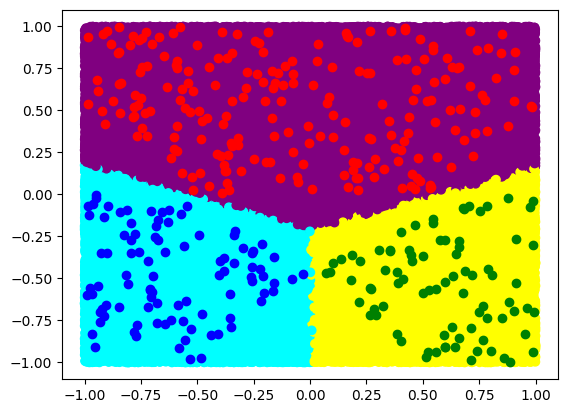

<Figure size 640x480 with 0 Axes>

In [44]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 16, 16, 16, 16, 3], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(len(layers_pmc))
number_of_layers = len(layers_pmc)
print(layers)

6
[ 2. 16. 16. 16. 16.  3.]


In [16]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X])

x = np.array(X,dtype=ctypes.c_float)
Y = np.array(Y,dtype=ctypes.c_float)

print(len(X[0]))
print(Y)

2
[[-1. -1.  1.]
 [-1. -1.  1.]
 [ 1. -1. -1.]
 ...
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]]


In [17]:
w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((3*16 + 17*16 + 17*16 +17*16+ 17*3,))) #3*16 + 17*16 + 17*3
#print(w_array)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)

In [18]:
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    3,  # number of classes to predict
    0.1,  # learning rate
    1,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (3*16 + 17*16 + 17*16 +17*16+ 17*3,))
#print(pmc_trained_model)


In [49]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(10000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(-1.0, 1.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)
pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    3,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (3 * len(X_to_predict),))
# print(pmc_predict_model)
# print(len(X_to_predict))
# print(len(X_to_predict_flat))
print(pmc_predict_model[0:11])

[ 0.9999324  -1.         -0.9999323  -0.99997026  0.9065101  -0.96346146
 -0.99083143 -0.9998754   0.99449444 -0.9997711   0.9937173 ]


In [50]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

# Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X])

for j in range(0,len(pmc_predict_model)-2,3) :
    if pmc_predict_model[j] > pmc_predict_model[j+1] and pmc_predict_model[j] > pmc_predict_model[j+2] :
        predicted_labels.append('cyan')
    elif pmc_predict_model[j+1] > pmc_predict_model[j] and pmc_predict_model[j+1] > pmc_predict_model[j+2] :
        predicted_labels.append('purple')
    elif pmc_predict_model[j+2] > pmc_predict_model[j] and pmc_predict_model[j+2] > pmc_predict_model[j+1]:
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('green')

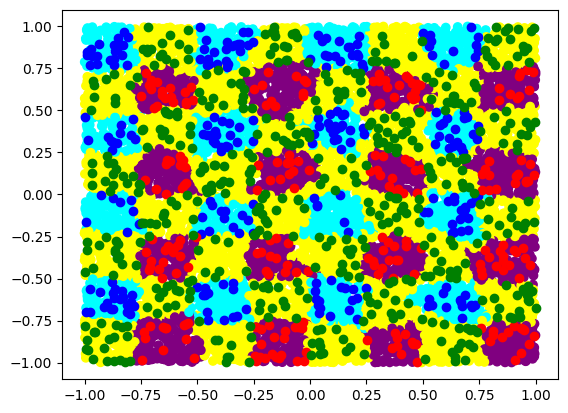

<Figure size 640x480 with 0 Axes>

In [51]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

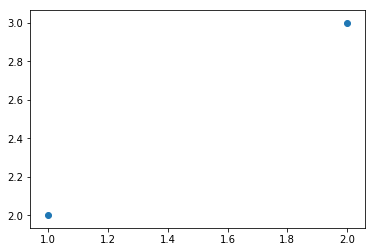

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

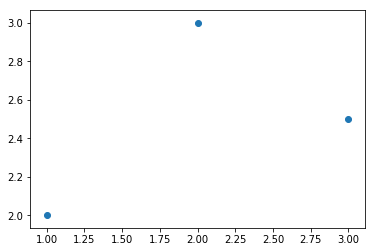

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [17]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

In [24]:
print(X[:,0])
print(X[:,1])

[1 2 3]
[1 2 1]


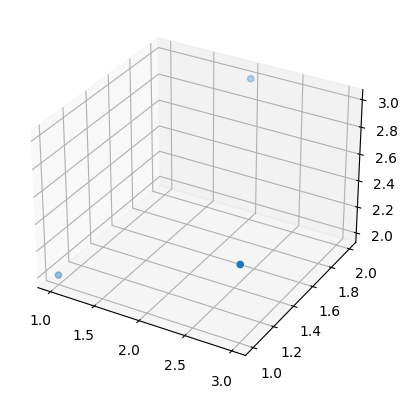

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
# plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [5]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [7]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>